In [1]:
    import numpy as np
    import pandas as pd
    import sklearn
    import seaborn as sns
    import matplotlib.pyplot as plt
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import mean_squared_error,mean_absolute_error
    from sklearn.model_selection import train_test_split
    import warnings
    warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("Baseball.csv")
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


Above details shows the whole dataset to be predicted

In [3]:
df=pd.DataFrame(data=df)

Convert the dataset to Dataframe

In [4]:
df.shape

(30, 17)

The above dataframe has 30 rows and 17 columns 

In [5]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

As we can see almost all columns in dataframe is integer datatype expect ERA column which float datatype

<AxesSubplot:>

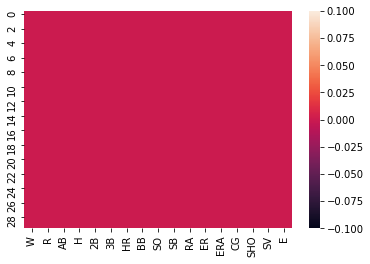

In [6]:
sns.heatmap(df.isnull())

The above heat map show there are no null values

In [7]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


The above data shows standard devation,Mean,Count,25%percentile,50%percentile,75%percentile,minimum value and maximum value

In [8]:
df["W"].unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

The above Traget variable values are all integer datatype

<AxesSubplot:>

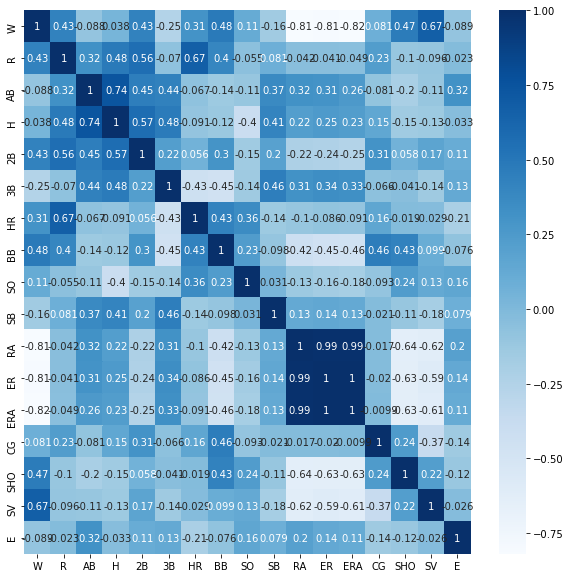

In [9]:
fig=plt.figure(figsize=(10,10))
hc=df.corr(method="pearson")
sns.heatmap(hc,annot=True,cmap="Blues")

This shows corelation values in a heatmap. As we can see independent variables are both positively and negatively corelated with Target variable

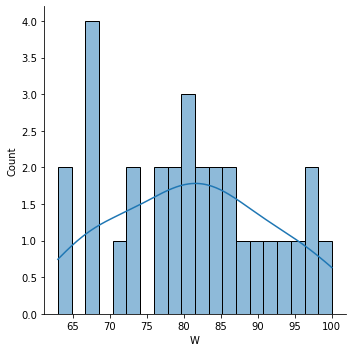

In [10]:
sns.displot(df["W"],bins=20,kde=True)

The above distribution plot for target variable shows curve is uniformally distributed.

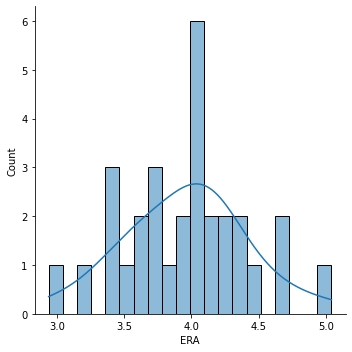

In [11]:
sns.displot(df["ERA"],bins=20,kde=True)

This is the distribution plot for column ERA

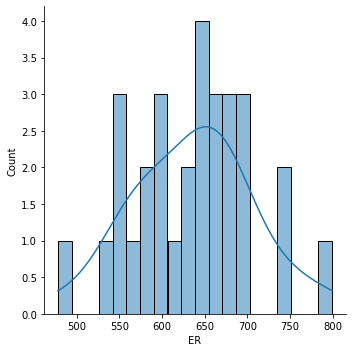

In [12]:
sns.displot(df["ER"],bins=20,kde=True)

This is the distribution plot for column ER

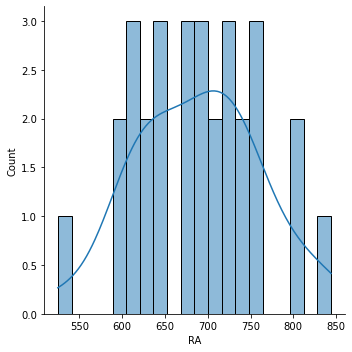

In [13]:
sns.displot(df["RA"],bins=20,kde=True)

This is the distribution plot for column RA

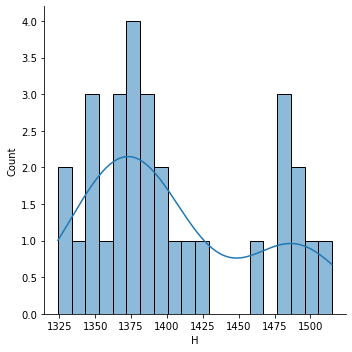

In [14]:
sns.displot(df["H"],bins=20,kde=True)

This is the distribution plot for column H and we can find skewness present in the column

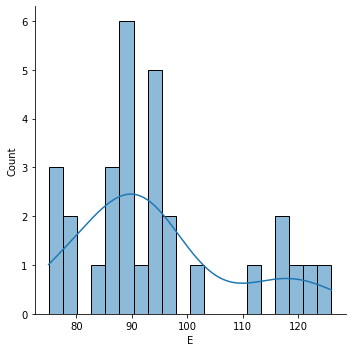

In [15]:
sns.displot(df["E"],bins=20,kde=True)

This is the distribution plot for column E and we can find skewness present in the column

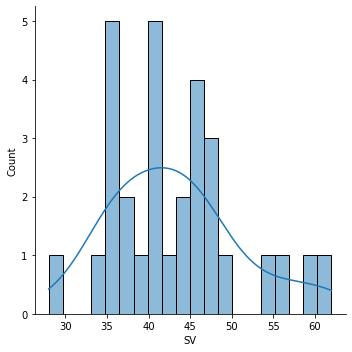

In [16]:
sns.displot(df["SV"],bins=20,kde=True)

This is the distribution plot for column SV 

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


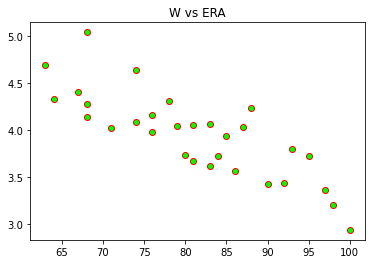

In [17]:
plt.scatter(df["W"],df["ERA"],alpha=1,c=(0,1,0),edgecolor="r")
plt.title("W vs ERA")
plt.show()

This shows the scatter plot for target variable VS column ERA. From the plot we can see column ERA is negatively correlated with target variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


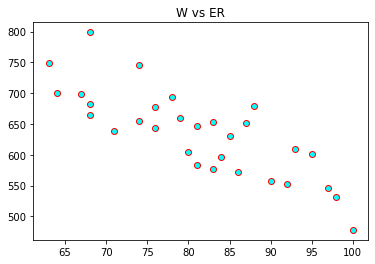

In [18]:
plt.scatter(df["W"],df["ER"],alpha=1,c=(0,1,1),edgecolor="r")
plt.title("W vs ER")
plt.show()

This shows the scatter plot for target variable VS column ER. From the plot we can see column ER is negatively correlated with target variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


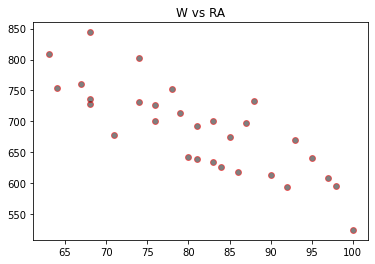

In [19]:
plt.scatter(df["W"],df["RA"],alpha=0.5,c=(0,0,0),edgecolor="r")
plt.title("W vs RA")
plt.show()

This shows the scatter plot for target variable VS column RA. From the plot we can see column RA is negatively correlated with target variable

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


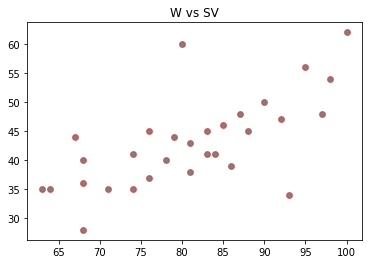

In [20]:
plt.scatter(df["W"],df["SV"],alpha=0.5,c=(0,0,0),edgecolor="r")
plt.title("W vs SV")
plt.show()

This shows the scatter plot for target variable VS column SV. From the plot we can see column SV is positively correlated with target variable

<AxesSubplot:xlabel='E'>

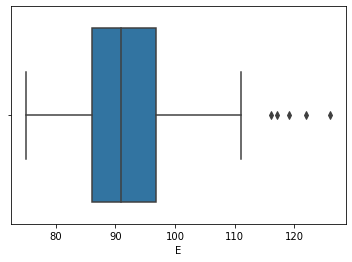

In [21]:
sns.boxplot(df["E"])

This shows the Boxplot for column E and it has outliers present.

<AxesSubplot:xlabel='SV'>

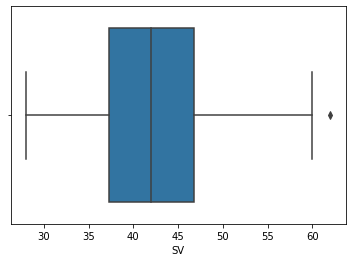

In [22]:
sns.boxplot(df["SV"])

This shows the Boxplot for column SV and it has outliers present.

<AxesSubplot:xlabel='SHO'>

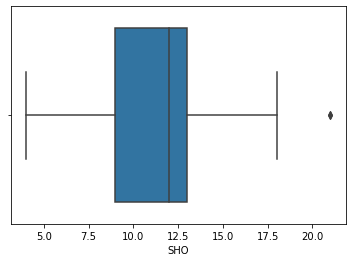

In [23]:
sns.boxplot(df["SHO"])

This shows the Boxplot for column SHO and it has outliers present.

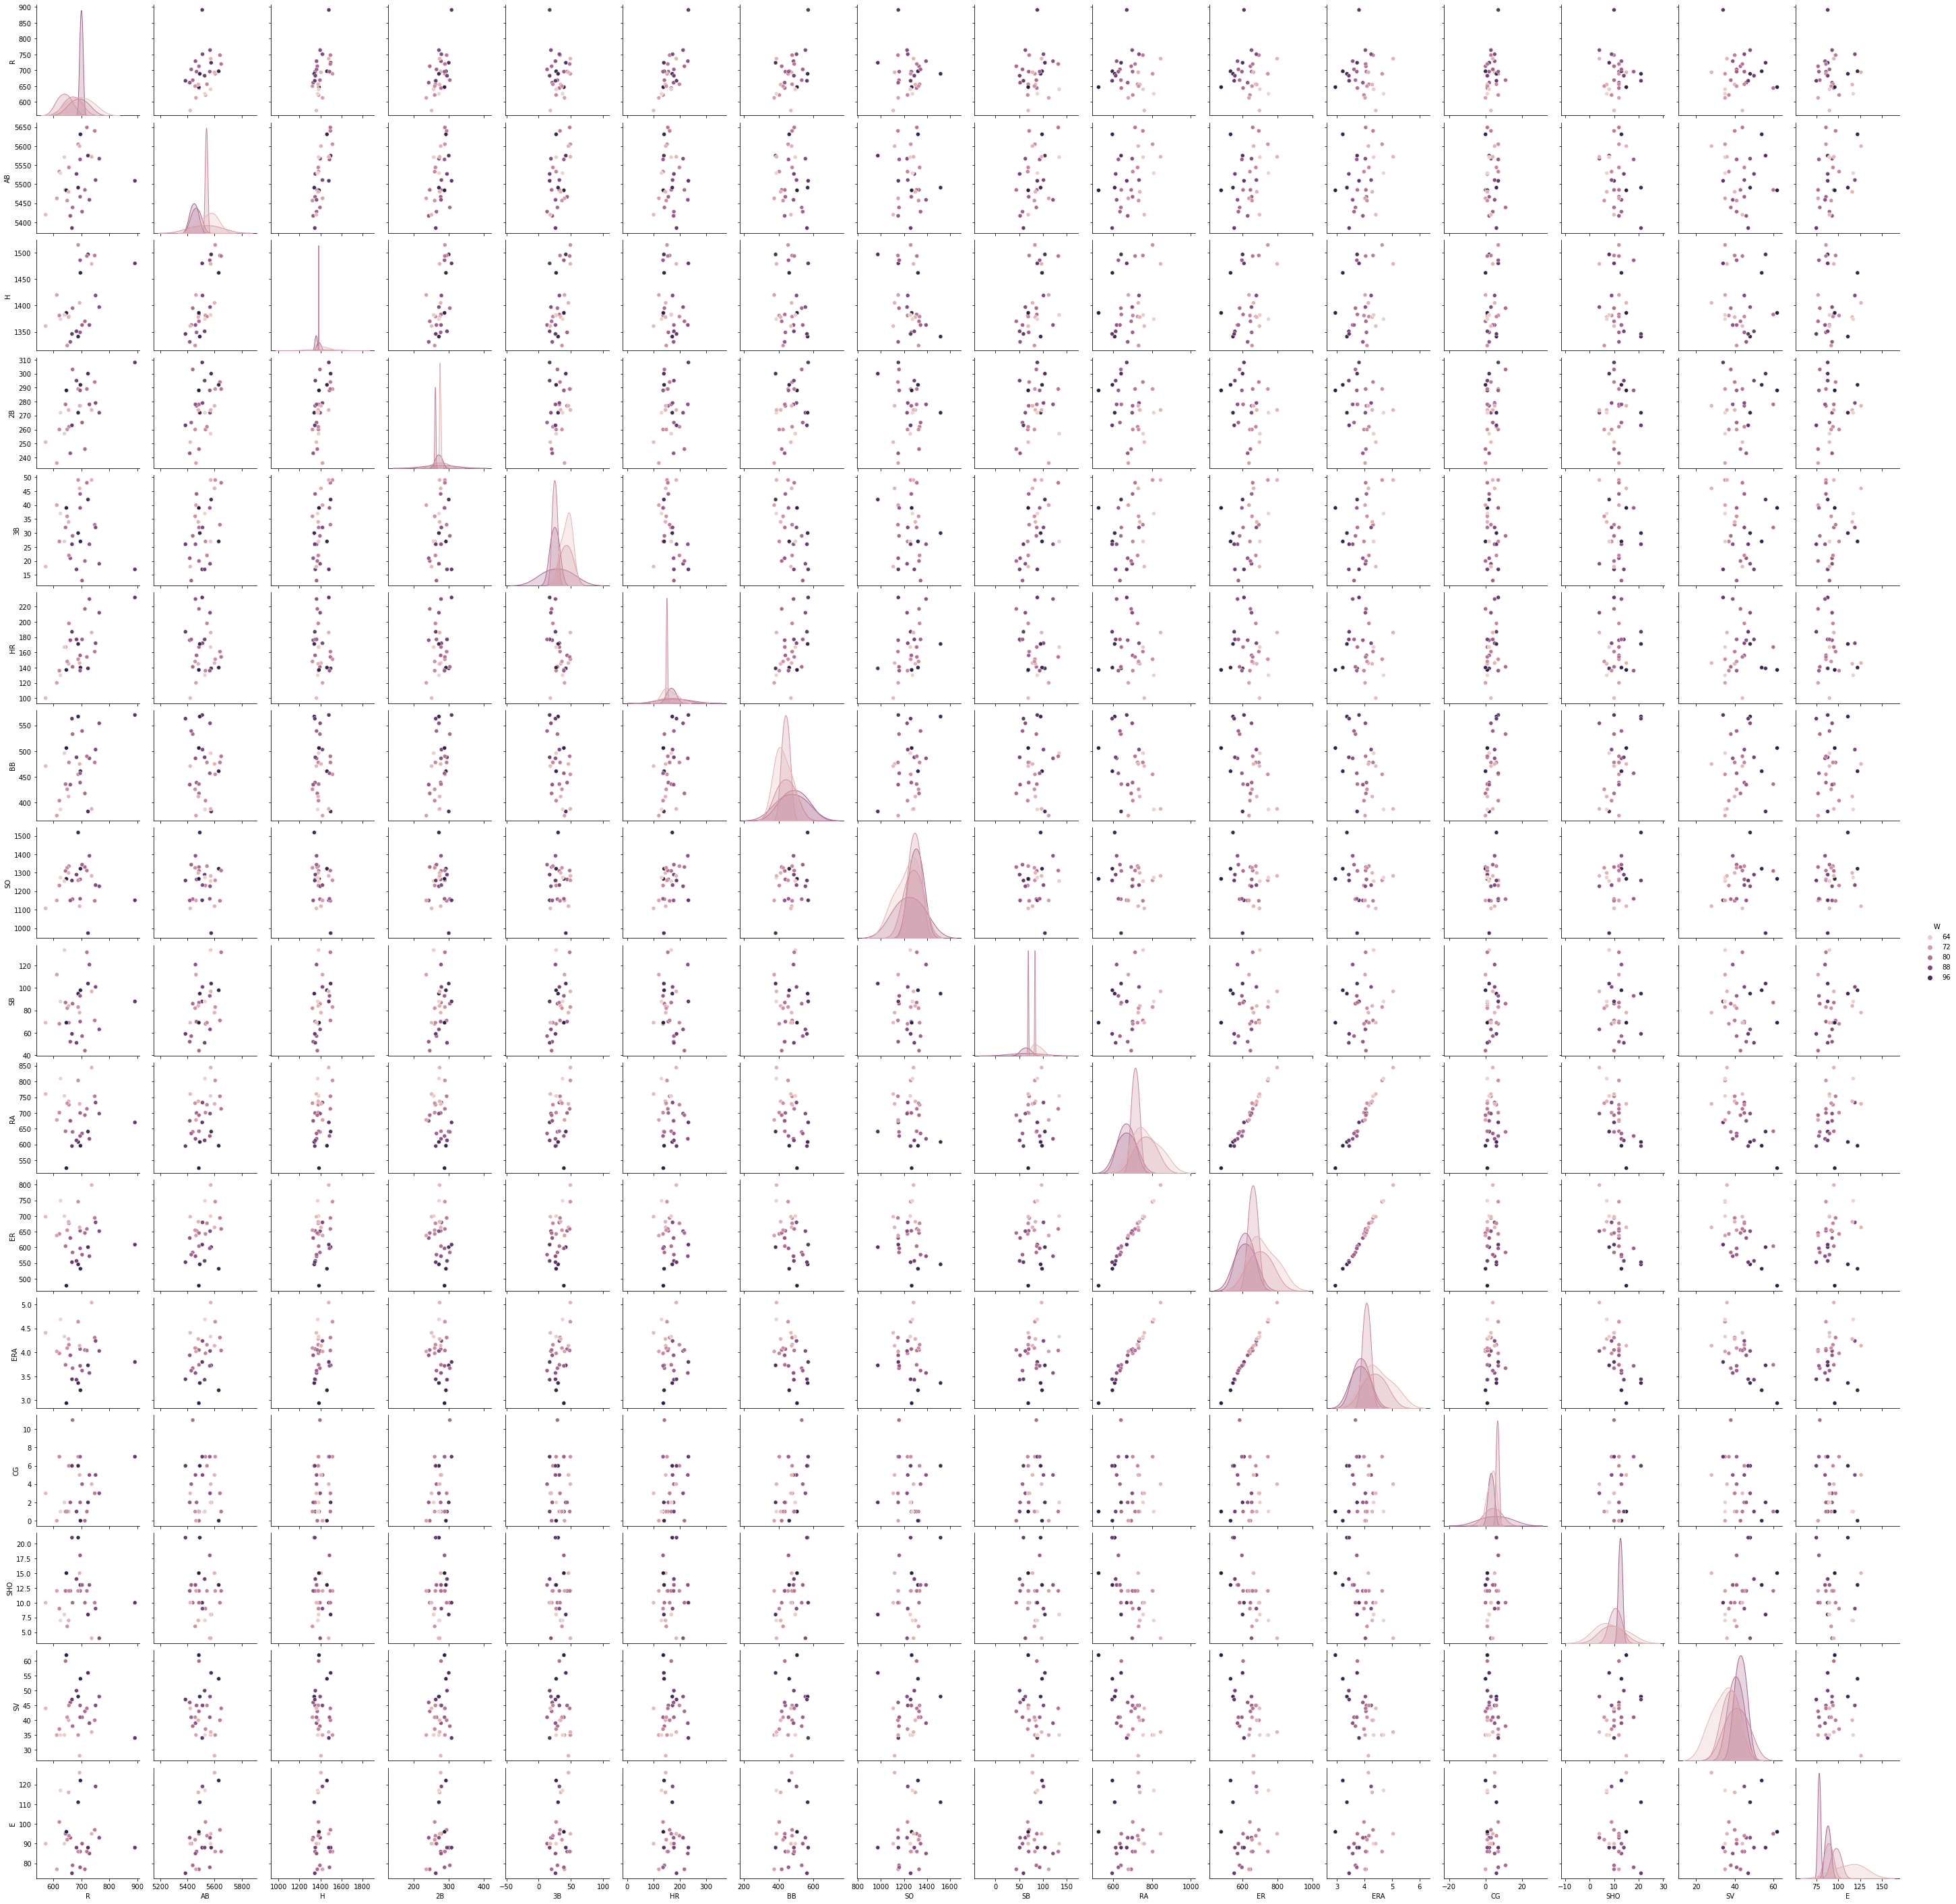

In [24]:
sns.pairplot(df,hue="W")

This shows the pair plot of the dataframe

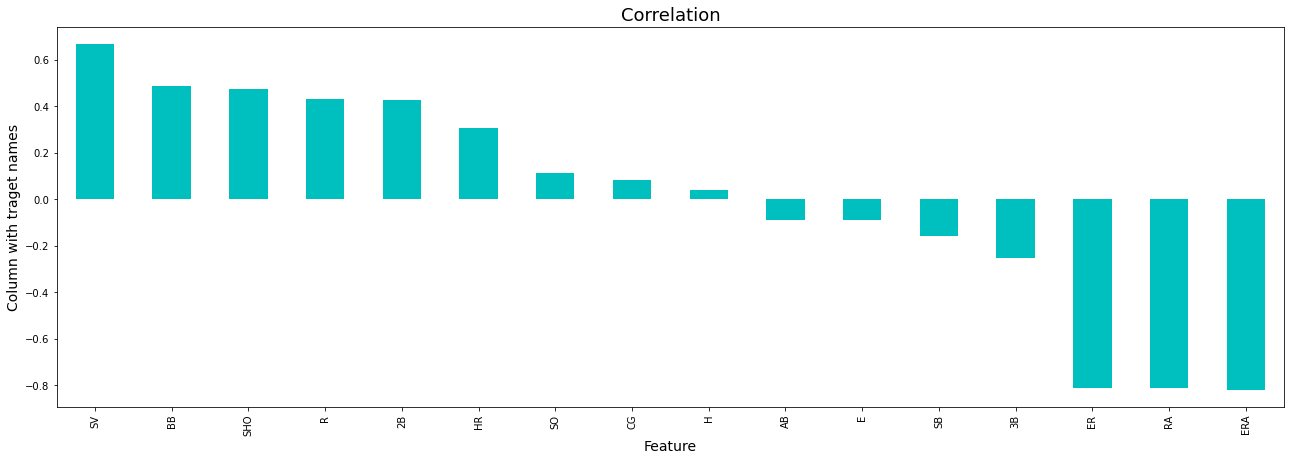

In [25]:
plt.figure(figsize=(22,7))
df.corr()["W"].sort_values(ascending=False).drop(["W"]).plot(kind="bar",color="c")
plt.xlabel("Feature",fontsize=14)
plt.ylabel("Column with traget names",fontsize=14)
plt.title("Correlation",fontsize=18)
plt.show()

Checking the columns which are positively and negatively correlated with the target variable

In [26]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

As we can see the above data has skewness range above +/-0.50. So we have to reduce it within the range

In [27]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1

df_new=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]

In [28]:
print("shape before and after")
print("shape before",":",df.shape)
print("shape after",":",df_new.shape)
print("Percentage loss",":",(df.shape[0]-df_new.shape[0])/df.shape[0])

shape before and after
shape before : (30, 17)
shape after : (20, 17)
Percentage loss : 0.3333333333333333


The above IQR methos is used to remove outliers in the dataframe but we can see the percentage of data lost is 33%.

In [29]:
from scipy.stats import zscore

zscr=np.abs(zscore(df))
threshold=3
print(np.where(zscr>3))

(array([5], dtype=int64), array([1], dtype=int64))


In [30]:
print("shape before removing the outliers",df.shape)
df_new1=df[(zscr<3).all(axis=1)]
print("shape after removing the outliers",df_new1.shape)

shape before removing the outliers (30, 17)
shape after removing the outliers (29, 17)


In [31]:
Dataloss=((30-29)/30)*100
Dataloss

3.3333333333333335

Since the percentage of data loss in IQR is 33% so i have tried zscore method, in the percentage of data lost is just 3.33%.

# Seperating columns into Independent variables and target variables

In [32]:
x=df_new1.drop("W",axis=1)
y=df_new1[["W"]]

# Using power transform to reduce the skew values

In [33]:
from sklearn.preprocessing import power_transform
df_new2=power_transform(x)

df_new2=pd.DataFrame(df_new2,columns=x.columns)

In [34]:
df_new2.skew()

R     -0.024842
AB     0.000000
H      0.000000
2B    -0.052793
3B    -0.075139
HR     0.000448
BB    -0.008572
SO     0.051530
SB    -0.009570
RA    -0.011974
ER    -0.004988
ERA   -0.000401
CG    -0.045947
SHO    0.000529
SV    -0.000925
E      0.065585
dtype: float64

As now we can all columns are within the skewness range

In [35]:
df_new2.shape

(29, 16)

In [36]:
collist=df_new2.columns.values
ncol=16
nrows=29

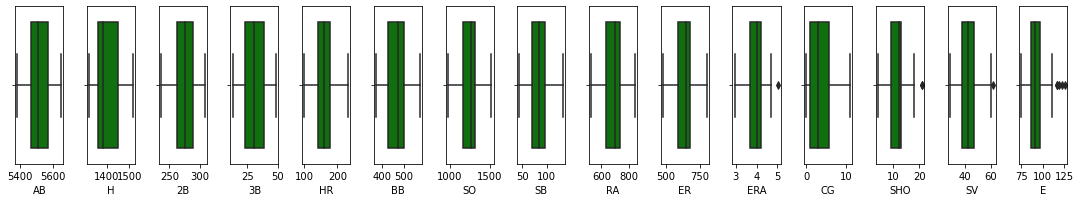

In [37]:
plt.figure(figsize=(ncol,5*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]],color="green",orient="v")
plt.tight_layout()

Box plot for all columns

<AxesSubplot:xlabel='E'>

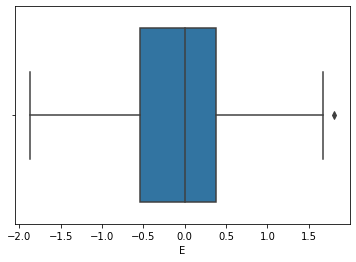

In [38]:
sns.boxplot(df_new2["E"])

As we can see outlier is close to wiskers and has reduced compared to initial boxplot for same columns 

<AxesSubplot:xlabel='SV'>

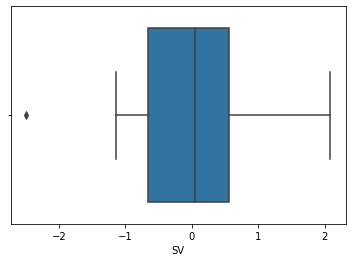

In [39]:
sns.boxplot(df_new2["SV"])

<AxesSubplot:xlabel='SHO'>

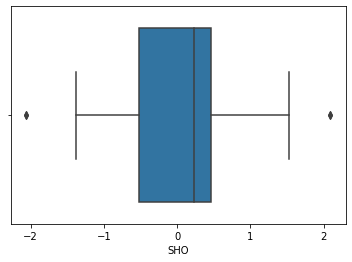

In [40]:
sns.boxplot(df_new2["SHO"])

# Standard Scaler

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
sc=StandardScaler()
x=sc.fit_transform(df_new2)
x=pd.DataFrame(x,columns=df_new2.columns)

In [43]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962544,0.0,0.0,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.0,0.0,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,0.0,0.0,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,0.0,0.0,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.0,0.0,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,0.0,0.0,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,0.0,0.0,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.0,0.0,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,0.0,0.0,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.0,0.0,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


In [44]:
df_new2.drop("AB",axis="columns",inplace=True)

In [45]:
df_new2.drop("H",axis="columns",inplace=True)

As we can see after standard scalling column AB and H have only zero values so i have dropped the columns from the dataframe

In [46]:
df_new2

,R,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.962544,1.685188,1.006150,-0.741927,-1.605198,-2.550612,0.936132,-0.660979,-0.508052,-0.509292,-0.307098,-0.787002,1.532753,-0.348265
1,0.298863,0.138198,1.185227,-0.109958,-0.462096,0.093683,-0.516377,0.160226,0.235800,0.241440,-0.307098,0.236737,0.312020,-0.540820
2,-0.312105,1.907385,-0.228819,-0.664354,1.232098,-0.935611,0.225038,-0.674967,-0.752214,-0.642098,2.011315,-0.252844,-0.664137,-1.326125
3,-1.308298,-0.837665,-0.432228,-0.860039,-1.162721,-0.230683,-0.618422,0.174077,0.093091,0.043013,1.264463,-0.513555,-0.820689,0.650818
4,0.137737,0.911435,1.622636,-0.289647,-0.155686,0.044143,0.095038,1.575971,1.555853,1.493491,1.264463,0.236737,-1.149165,-0.540820
5,1.964209,-0.163010,-1.295827,1.631637,1.579494,-0.269583,-0.884526,0.132517,0.221537,0.153276,0.121871,-2.064039,0.677176,0.082858
6,0.698146,-1.542635,-1.182758,1.767734,-0.877217,0.770980,-2.082843,0.063208,0.135920,0.197363,-1.732896,-0.252844,0.052325,-1.588197
7,-0.852595,0.199897,0.068703,0.269125,-0.520476,0.556008,0.267558,-0.646992,-0.465016,-0.487168,-0.870682,0.236737,1.908137,0.237592
8,1.555951,1.255256,0.166017,0.065014,0.270944,-1.019210,-0.466233,0.891396,0.819308,0.769577,0.121871,-0.252844,-0.365006,0.383386
9,1.631727,0.262086,0.068703,0.434620,0.717576,-0.211199,0.824915,0.616173,0.620346,0.615685,0.770649,-0.513555,0.312020,1.554265


In [47]:
x=df_new2

In [48]:
x.shape

(29, 14)

In [49]:
y.shape

(29, 1)

   # Train test split

In [50]:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=43)
    print(x_train.shape)
    print(x_test.shape)
    print(y_train.shape)
    print(y_test.shape)

(22, 14)
(7, 14)
(22, 1)
(7, 1)


# Linear Regression

In [51]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
from sklearn.metrics import r2_score

In [52]:
lr.fit(x_train,y_train)

LinearRegression()

In [53]:
lr.coef_

array([[  4.09101489,  -1.36348573,   2.26648405,   1.5408231 ,
         -0.55239125,  -2.9260081 ,  -0.96304994,  13.23843144,
        -11.12590369,  -8.22500284,   1.42885238,   2.65019003,
          3.50191224,   1.87555868]])

In [54]:
lr.intercept_

array([81.55990844])

In [55]:
lr.score(x_train,y_train)

0.9808433231810754

In [56]:
for i in range(0,100):
    lr.fit(x_train,y_train)
    pred_train=lr.predict(x_train)
    pred_test=lr.predict(x_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(y_train,pred_train)}")
    print(f"At random state{i},the testing accuracy is :- {r2_score(y_test,pred_test)}")
    print("\n")

At random state0,the training accuracy is :- 0.9808433231810754
At random state0,the testing accuracy is :- -0.2197169181709444


At random state1,the training accuracy is :- 0.9808433231810754
At random state1,the testing accuracy is :- -0.2197169181709444


At random state2,the training accuracy is :- 0.9808433231810754
At random state2,the testing accuracy is :- -0.2197169181709444


At random state3,the training accuracy is :- 0.9808433231810754
At random state3,the testing accuracy is :- -0.2197169181709444


At random state4,the training accuracy is :- 0.9808433231810754
At random state4,the testing accuracy is :- -0.2197169181709444


At random state5,the training accuracy is :- 0.9808433231810754
At random state5,the testing accuracy is :- -0.2197169181709444


At random state6,the training accuracy is :- 0.9808433231810754
At random state6,the testing accuracy is :- -0.2197169181709444


At random state7,the training accuracy is :- 0.9808433231810754
At random state7,the testi

In [57]:
pred=lr.predict(x_test)
print("Predicted result : ",pred)
print("actual result",y_test)

Predicted result :  [[92.19841152]
 [78.1638819 ]
 [86.48604153]
 [78.55657283]
 [83.8993013 ]
 [85.27205966]
 [85.66107608]]
actual result      W
25  92
13  76
14  68
7   81
8   80
9   78
11  86


The above values shows actual and predicted values obtained

In [58]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr
dtr.score(x_train,y_train)

1.0

In [59]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsv=dtr.predict(x_test)
predsv
sv.score(x_train,y_train)

0.2828911392349155

# MSE,MBE and RMBE

In [60]:
print("error:")
print("Mean absolute error : ",mean_absolute_error(y_test,pred))
print("Mean square error : ",mean_squared_error(y_test,pred))
print(" Root Mean absolute error : ",np.sqrt(mean_squared_error(y_test,pred)))

error:
Mean absolute error :  4.971720999632835
Mean square error :  60.089727356421626
 Root Mean absolute error :  7.751756404610611


In [61]:
print(r2_score(y_test,pred))

-0.2197169181709444


      #tried many transformation and scaling but couldn't get R2 score in positive

# DecisionTreeRegressor and its accuracy score

In [1]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
preddtr=dtr.predict(x_test)
preddtr
dtr.score(x_train,y_train)

NameError: name 'x_train' is not defined

# Support vector regressor and its accuracy score

In [ ]:
from sklearn.svm import SVR
sv=SVR()
sv.fit(x_train,y_train)
predsv=dtr.predict(x_test)
predsv
sv.score(x_train,y_train)

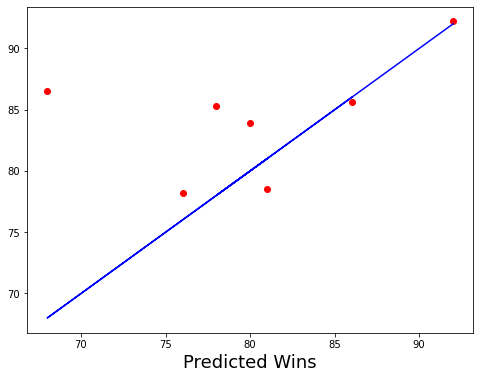

In [62]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test,y=pred_test,color="r")
plt.plot(y_test,y_test,color="b")
plt.xlabel("Actual Wins",fontsize=14)
plt.xlabel("Predicted Wins",fontsize=18)
plt.show()

The above scatter plot shows the Actual wins VS Predicted Wins

# Regularization with Lasoo and Ridge Regressor

In [63]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [64]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 0.1, 'random_state': 0}


In [65]:
ls=Lasso(alpha=.1,random_state=0)
ls.fit(x_train,y_train)
ls.score(x_train,y_train)
pred_ls=ls.predict(x_test)

lss=r2_score(y_test,pred_ls)
lss

0.5682534757973285

In [66]:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.47376134919180213

In [67]:
parameters={"alpha":[.0001,.001,.01,.1,1,10],"random_state":list(range(0,10))}
rd=Ridge()
clf=GridSearchCV(rd,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 1, 'random_state': 0}


In [68]:
rd=Ridge(alpha=1,random_state=0)
rd.fit(x_train,y_train)
rd.score(x_train,y_train)
pred_rd=rd.predict(x_test)

rdr=r2_score(y_test,pred_rd)
rdr

0.4126232108216962

In [69]:
cv_score=cross_val_score(rd,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.4664680433121108

As we can find Lasso has more efficiency compared to Ridge Regressor

# Ensemble Methods using Random forest and Ada booster

In [70]:
from sklearn.ensemble import RandomForestRegressor

In [71]:
parameters={"criterion":["mse","mae"],"max_features":["auto","sqrt","log2"]}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [72]:
rf=RandomForestRegressor(criterion="mse",max_features="auto")
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_rf=rf.predict(x_test)

rfs=r2_score(y_test,pred_rf)
print("R2 score : ",rfs*100)

rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print("Cross Val Score : ",rfs*100)

R2 score :  23.572584921292506
Cross Val Score :  23.572584921292506


In [73]:
from sklearn.ensemble import AdaBoostRegressor

In [74]:
ad=AdaBoostRegressor(n_estimators=100)
ad.fit(x_train,y_train)
ad.score(x_train,y_train)
pred_ad=ad.predict(x_test)

ads=r2_score(y_test,pred_ad)
print("R2 score : ",ads*100)

adscore=cross_val_score(ad,x,y,cv=5)
adc=adscore.mean()
print("Cross Val Score : ",ads*100)

R2 score :  -17.475061881821063
Cross Val Score :  -17.475061881821063


As we can see Random forest has more acuuracy compared to Ada boost regerssor

In [81]:
score=cross_val_score(sv,x,y,cv=5)
print(score)
print(score.mean())

[-0.07365335 -1.22069014  0.00330926 -0.38802044  0.21124103]
-0.2935627297709578


In [84]:
score=cross_val_score(dtr,x,y,cv=5)
print(score)
print(score.mean())

[ -2.18068182 -10.02631579   0.30572982  -0.37540984  -0.45341981]
-2.54601948697658


# Saving the best model accuracy

In [78]:
import pickle
filename="Basketball.pkl"
pickle.dump(rf,open(filename,"wb"))

# Conclusion

In [79]:
loaded_model=pickle.load(open("Basketball.pkl","rb"))
result=loaded_model.score(x_test,y_test)
print(result)

0.23572584921292505


In [80]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:]],index=["Predicted","Original"])
conclusion

,0,1,2,3,4,5,6
Predicted,90.76,82.26,76.88,78.96,90.07,74.23,81.08
Original,90.76,82.26,76.88,78.96,90.07,74.23,81.08
